# Homework 4. Frequent Words and Web scraping

***Double Click here to edit this cell***

- Name: 조성현
- Student ID:201803430 
- Submission date: 22.05.12


## Problem 1 (15 pts)

- Project Gutenberg is a volunteer effort to digitize and archive cultural works.
- Moby-Dick is an 1851 novel by American writer Herman Melville.
- You can find Moby-Dick in an ordinary text format at https://www.gutenberg.org/files/2701/old/moby10b.txt
- Use **requests** module to get the text.


- We want to compute word frequency of words appearing in mobydick and generate WordCloud
    - First, you must split the text into words. 
    - **Any symbols(!, ., ?, ,, +, -, *, ...)** are delimeters
    - Numbers should not be words. 
    - Null string is not a word. 
    - Any delimiters should not be words.
    - To split into words, use **re** (regular expression module)
    - (Upper or lower) Cases does not matter in words

### 1.1 Print top 50 most common words (5 pts)

In [1]:
# YOUR CODE MUST BE HERE
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
import re

Mobydick_url ="https://www.gutenberg.org/files/2701/old/moby10b.txt" 
m_text = requests.get(Mobydick_url).text
pre_txt = re.sub('\s', ' ',m_text)
preprocessed_text = re.sub('[^a-zA-Z]', ' ',m_text)
answcount=Counter(preprocessed_text.lower().split())
print(answcount.most_common(50))

[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]


 **Your output should be like the following**:
 ```python
[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]
```

### 1.2 Plot word frequency (5 pts)

- Sort the word frequency in descending order
- Plot the word frequency
- Plot the word frequency in log-log plot.

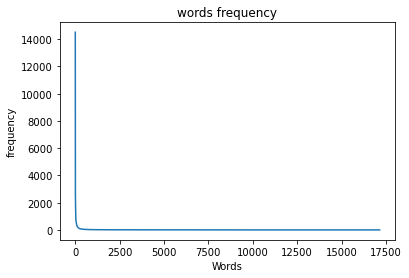

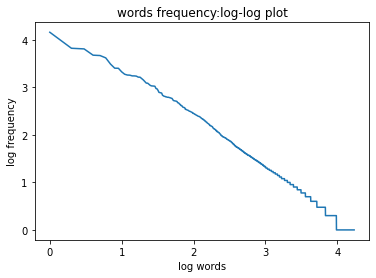

In [2]:
# YOUR CODE MUST BE HERE
import matplotlib.pyplot as plt
import numpy as np
Sorted_Dict_Values = sorted(answcount.values(), reverse=True)
ylist = Sorted_Dict_Values
n = len(answcount)
xlist = np.arange(1,n+1,1)


plt.plot(xlist,ylist)
plt.xlabel('Words')
plt.ylabel('frequency')
plt.title('words frequency')
plt.show()


logydata = np.log10(ylist)
logxdata = np.log10(xlist)

plt.xlabel('log words')
plt.ylabel('log frequency')
plt.title('words frequency:log-log plot')
plt.xscale("linear")
plt.yscale("linear")

plt.plot(logxdata,logydata)
plt.show()

**Your output should be like**:
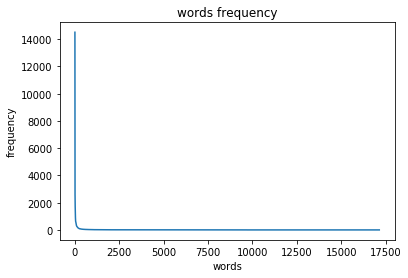



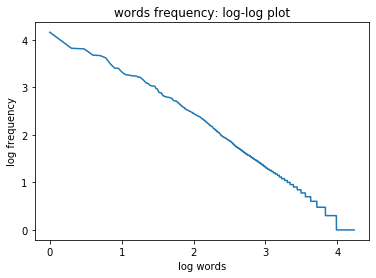

### Discussion

- Read this wikipedia article : https://ko.wikipedia.org/wiki/%EC%A7%80%ED%94%84%EC%9D%98_%EB%B2%95%EC%B9%99)
- Discuss what you learned from the distribution.


```
WRITE HERE (To edit, double click this cell)

*  단어들을 그 사용 빈도가 높은 순서대로 나열하였을 때, 모든 단어의 사용 빈도는 해당 단어의 순위에 반비례한다 이는 가장 사용빈도가 높은 단어는 두 번째 단어보다 빈도가 약 두배 높으며, 세번째 단어보다는 빈도가 세배 높다. 언어학이 아닌 분야에서도 발견하는데 그 예로 도시의 인구 순위 기업의 크기 등이다. 

* 지프의 법칙이 적용되는지는 로그회귀를 통하여 확인을 한다.   식으로는 다음과 같다
데이터의 순위 R, 해당 데이터의 값 n, 그리고 상수값 a, b로 이루어지는 로그 회귀 R = a - b log n을 적용함

*지프의 법칙의 가장 단순한 예는 “1⁄f 함수”이다. 지프 분포를 따르는 빈도가 순위에 따라 정렬되어 주어졌을 때, 2위에 해당하는 빈도는 1위의 빈도의 ½이 된다. 3위의 빈도는 1위 빈도의 ⅓이 된다.

지프의 법칙이 나타나는 데이터 혹은, 데이터에서 발견을 하면 이는 데이터들은 발생횟수가 독립적이라는 의미를 내포하며(로그 회귀의 조건),
특정 말뭉치(단어)와 같은 데이터의 빈도수는 순위에 반비례 한다고 말 할 수 가 있다.


```


### 1.3 Word Cloud (5 pts)

- Print top 100 most words except stop words
- Draw word cloud of top 100 most common words
- Googling for how to draw word clouds

**Your output should be like**:
```python
[('whale', 1228), ('one', 934), ('like', 648), ('man', 527), ('ship', 518), ('ahab', 511), ('sea', 455), ('old', 450), ('though', 384), ('head', 345), ('yet', 345), ('time', 339), ('boat', 336), ('long', 334), ('captain', 329), ('still', 313), ('great', 306), ('said', 304), ('two', 299), ('seemed', 283), ('white', 281), ('last', 279), ('see', 275), ('thou', 271), ('way', 271), ('whales', 268), ('stubb', 257), ('queequeg', 252), ('little', 249), ('round', 247), ('three', 246), ('say', 244), ('men', 244), ('sperm', 244), ('first', 237), ('every', 233), ('us', 232), ('well', 230), ('much', 223), ('good', 217), ('could', 217), ('hand', 214), ('side', 208), ('look', 207), ('ever', 207), ('never', 206), ('starbuck', 198), ('deck', 196), ('go', 195), ('even', 195), ('almost', 195), ('water', 190), ('thing', 188), ('away', 185), ('made', 180), ('come', 179), ('world', 178), ('day', 178), ('sir', 175), ('life', 174), ('chapter', 173), ('pequod', 173), ('among', 171), ('fish', 169), ('many', 166), ('seen', 165), ('far', 165), ('back', 164), ('without', 158), ('let', 158), ('line', 158), ('eyes', 156), ('oh', 156), ('cried', 155), ('aye', 155), ('know', 153), ('sort', 153), ('right', 152), ('god', 152), ('part', 150), ('thought', 150), ('night', 150), ('boats', 147), ('air', 143), ('crew', 140), ('take', 139), ('whole', 137), ('small', 136), ('tell', 136), ('things', 136), ('half', 136), ('thus', 133), ('whaling', 131), ('came', 130), ('soon', 130), ('hands', 130), ('mast', 129), ('feet', 127), ('something', 125), ('till', 123)
```
**Your output should be like this (but NOT exactly the the same)**:
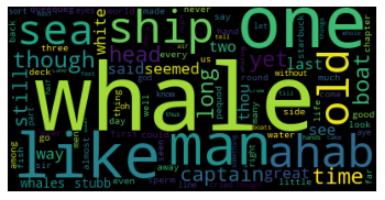

- The following is English stop words list

In [3]:
nltk_stopwords = {'below', 'that', 'very', 'those', 'some', 'couldn', 'weren', 'were', 'while', 'why', 'are', 'so', 'does', 'should', 'this', 'y', "haven't", 'about', 'and', 'because', 'if', "shan't", "hasn't", 'hasn', 'mightn', 'm', 'her', 'ours', "hadn't", 'haven', 'when', "should've", 'a', 'mustn', 'needn', 'the', "couldn't", "aren't", 'more', "mightn't", 't', 'whom', 'don', 'by', 'am', 'under', 'too', 'did', 'now', 'in', 'can', "shouldn't", 'd', 'how', 'it', 'didn', 'ma', 'herself', 'most', 'further', 'isn', 'myself', "won't", "isn't", 'these', 'into', 'wasn', 're', "you'd", 'who', "needn't", 'after', 'be', 'few', 'here', 'shouldn', 'where', 'of', 'been', 'then', 'ourselves', 'other', 'his', 's', 'again', 'them', "it's", 'o', 'as', 'has', "doesn't", 'had', 'won', 'do', 'being', 'hadn', "that'll", "she's", 'same', 'itself', 'there', "you're", "wouldn't", "you've", 'having', 'out', 'is', 've', 'was', 'doing', 'doesn', 'with', 'i', 'only', "didn't", "mustn't", 'him', 'wouldn', 'all', 'for', 'themselves', 'but', 'theirs', 'nor', 'to', 'from', 'will', 'until', 'they', 'against', 'than', 'down', 'their', 'above', 'off', 'me', 'at', 'shan', 'own', 'just', "you'll", 'an', 'once', 'over', 'aren', 'or', "wasn't", 'its', 'not', 'yours', 'through', 'll', 'on', 'himself', 'he', 'have', 'yourself', 'you', 'which', 'no', 'before', 'each', 'our', 'what', "weren't", 'during', 'she', 'up', 'we', 'your', 'hers', 'my', 'both', 'yourselves', "don't", 'ain', 'any', 'between', 'such'}
stopwords = nltk_stopwords | {'ye', 'upon', 'would', 'must', 'may', 'might', 'thee'}

In [4]:
#!pip install wordcloud

In [5]:
# YOUR CODE MUST BE HERE
totalWords = preprocessed_text.lower().split()
j_w =[]
for word in totalWords:
    if word in stopwords: continue
    else:j_w.append(word)

justword = Counter(j_w)
print(justword.most_common(100))

[('whale', 1228), ('one', 934), ('like', 648), ('man', 527), ('ship', 518), ('ahab', 511), ('sea', 455), ('old', 450), ('though', 384), ('head', 345), ('yet', 345), ('time', 339), ('boat', 336), ('long', 334), ('captain', 329), ('still', 313), ('great', 306), ('said', 304), ('two', 299), ('seemed', 283), ('white', 281), ('last', 279), ('see', 275), ('thou', 271), ('way', 271), ('whales', 268), ('stubb', 257), ('queequeg', 252), ('little', 249), ('round', 247), ('three', 246), ('say', 244), ('men', 244), ('sperm', 244), ('first', 237), ('every', 233), ('us', 232), ('well', 230), ('much', 223), ('good', 217), ('could', 217), ('hand', 214), ('side', 208), ('look', 207), ('ever', 207), ('never', 206), ('starbuck', 198), ('deck', 196), ('go', 195), ('even', 195), ('almost', 195), ('water', 190), ('thing', 188), ('away', 185), ('made', 180), ('come', 179), ('world', 178), ('day', 178), ('sir', 175), ('life', 174), ('chapter', 173), ('pequod', 173), ('among', 171), ('fish', 169), ('many', 166

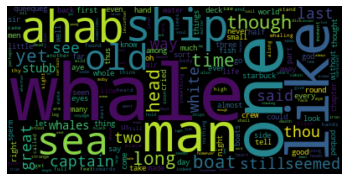

In [6]:
#Draw word cloud of top 100 most common words  - with google

from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud( background_color = 'black')
frequency_d = dict(justword)
plt.imshow(word_cloud.generate_from_frequencies(frequency_d),interpolation = "bilinear")
plt.axis("off")
plt.show()

## Problem 2 (20 pts)

- We want to find how many CS faculty members at CS department of Stanford Univ work on CS research areas.
- First, visit https://cs.stanford.edu/research
- Take a look at the source html of the web page.
- We want to scrape data on all the faculty members
- Run the following two cells and see what happens
- If necessary, install html5lib

In [7]:
from bs4 import BeautifulSoup
import requests

url = "https://cs.stanford.edu/research?items_per_page=All&field_faculty_status_value=active"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

# f = open("stanford_cs.txt", "r")
# text = f.read()
# soup = BeautifulSoup(text, 'html5lib')

## Remark

- Stanford Univ에 너무 많이 접속해서 (DDOS처럼 여겨져서) 접속이 막힐 수도 있음
- 해당 웹페이지를 처음 접속해서 파일로 저장한 다음,
- 파일로 부터 읽어서 숙제를 테스트하는 게 필요함.

In [8]:
# print(soup.tbody.prettify())

### Draw bar charts on research area contributions of Stanford CS faculty

- The followings are research fields
```python
['Architecture', 'Artificial Intelligence', 'Computational Biology', 'Computer Graphics', 'Computer Security', 'Computer Systems', 'Computer Vision', 'Data Science', 'Education', 'Human-Computer Interaction (HCI)', 'Machine Learning', 'Natural Language Processing', 'Networking', 'Operating/Distributed Systems', 'Programming Systems and Verification', 'Robotics', 'Theory']
```

- In plotting, use the following abbreviations:

```
['ARC', 'AI', 'BIO', 'CG', 'SEC', 'SYS', 'VIS', 'DS', 'EDU', 'HCI', 'ML', 'NLP', 'NET', 'ODS', 'PS', 'ROB', 'TH']
```

- For each research area, we want to compute how many professors works on that area.
- If one professor works on n research fields, the contribution to one research field is 1/n.
- The colors for professor ranks (assistant, associate, full professors) may be your own choice.
- Your output should be like:

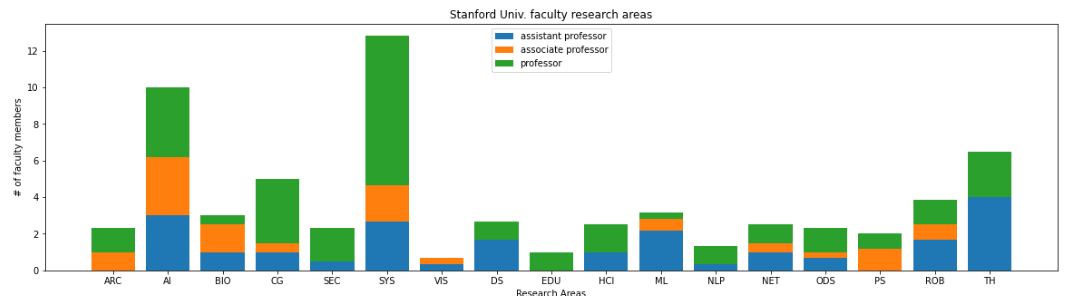

<function matplotlib.pyplot.show(close=None, block=None)>

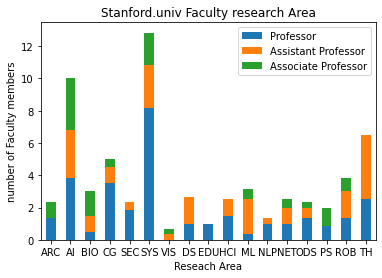

In [11]:
# YOUR CODE MUST BE HERE
from urllib.request import urlopen
import pandas as pd
import numpy as np
import  bs4

source = urlopen(url).read()   # 지정한 페이지에서 코드 읽기
source = bs4.BeautifulSoup(source, 'lxml')   # 뷰티풀스프로 태그별로 코드 분류
title = source.find_all('td', class_='views-field views-field-field-faculty-title fac_prof_view_title')
focus = source.find_all('td', class_='views-field views-field-field-research-focus fac_prof_view_focus')


title_all=[]
focus_all=[]
#parsing for title and focus
for i in range(len(title)):
    tmp ="<td class=\"views-field views-field-field-faculty-title fac_prof_view_title\">\n            "
    title_all.append(str(title[i]).replace(tmp,"").replace("          </td>",""))
    tmp ="<td class=\"views-field views-field-field-research-focus fac_prof_view_focus\">\n            "
    focus_all.append(str(focus[i]).replace(tmp,"").replace("          </td>",""))
    
    
origin =['Architecture', 'Artificial Intelligence', 'Computational Biology',
         'Computer Graphics', 'Computer Security', 'Computer Systems', 'Computer Vision',
         'Data Science', 'Education', 'Human-Computer Interaction (HCI)',
         'Machine Learning', 'Natural Language Processing', 'Networking',
         'Operating/Distributed Systems', 'Programming Systems and Verification', 'Robotics', 'Theory']

data = np.array([ [0.0]*len(origin),[0.0]*len(origin),[0.0]*len(origin)])
answer = pd.DataFrame(data,index =['Professor', 'Assistant Professor','Associate Professor'],columns=origin)



#change for series to readt to make dataframe
focus_result=[]
title_result=[]
for i in range(len(title_all)):
    if "<br/>" in focus_all[i]:
        tmp = focus_all[i].split("<br/>")
#         print(tmp)
        for j in range(len(tmp)):
            answer.loc[title_all[i]][tmp[j]] += (1/len(tmp))            
    else:
        answer.loc[title_all[i]][focus_all[i]] += 1

tag =['ARC', 'AI', 'BIO', 'CG', 'SEC', 'SYS', 'VIS', 'DS', 'EDU', 'HCI',
      'ML', 'NLP', 'NET', 'ODS', 'PS', 'ROB', 'TH']

answer.columns=tag
last=answer.T



#draw
ax = last.plot(kind='bar',rot = 0,stacked=True)
plt.xlabel('Reseach Area')
plt.ylabel('number of Faculty members')
plt.title('Stanford.univ Faculty research Area')
plt.show

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_4_홍길동_202200001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills